In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
from sklearn.preprocessing import normalize
import seaborn as sb            
from utils import *

In [2]:
# Retrieving data and basic checks
df1 = pd.read_csv('../data/Pima.csv')
assert df1.isnull().sum().sum() == 0 # check that there is no null value
df1.head(n = 5)

,npreg,glu,bp,skin,bmi,ped,age,z
0,5,86,68,28,30.2,0.364,24,1
1,5,77,82,41,35.8,0.156,35,1
2,0,165,76,43,47.9,0.259,26,1
3,0,107,60,25,26.4,0.133,23,1
4,3,83,58,31,34.3,0.336,25,1


In [3]:
# Retrieving data and basic checks
df2 = pd.read_csv('../data/winequality-red.csv', sep= ';')
assert df2.isnull().sum().sum() == 0 # check that there is no null value
df2.head(n = 5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# 1st classification problems : Pima binary classification probs
# Building subsets
X1 = df1.iloc[:,0:-1]
y1 = df1.iloc[:,-1]

[m1, n1] = X1.shape
print('1st DataFrame:\n' +
     ' - Dimension n1 = {}\n'.format(n1) +
     ' - Size m1 = {}\n'.format(m1) +
     ' - type of features = {}'.format('numericals / continuous & discrete'))

1st DataFrame:
 - Dimension n1 = 7
 - Size m1 = 532
 - type of features = numericals / continuous & discrete


In [5]:
# Check for highly correlated features
Xtemp = df1.corr().unstack().reset_index()
Xtemp[(Xtemp[0]>0.5) & (Xtemp[0] != 1)]

,level_0,level_1,0
6,npreg,age,0.640747
15,glu,z,0.503614
28,skin,bmi,0.647422
35,bmi,skin,0.647422
48,age,npreg,0.640747
57,z,glu,0.503614


In [6]:
# npreg and bmi are highly correlated to other features.
Xtemp1 = X1.drop(['npreg', 'bmi'], axis =1)

In [7]:
# Compare covariance and mean (distribution of data from class 1 is the same as data from class2)
mu1 = X1[y1 == 1].mean()
print(mu1)
print('p1 = ' + str(X1[y1 == 1].shape[0]/m1))
cov1 = X1[y1 == 1].cov()
cov1[cov1 < 30] = 0
cov1

npreg      2.926761
glu      110.016901
bp        69.912676
skin      27.290141
bmi       31.429577
ped        0.446315
age       29.222535
dtype: float64
p1 = 0.6672932330827067


,npreg,glu,bp,skin,bmi,ped,age
npreg,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
glu,0.0,589.852821,56.252892,32.568529,0.000000,0.0,42.911482
bp,0.0,56.252892,141.684443,0.000000,0.000000,0.0,39.423442
skin,0.0,32.568529,0.000000,101.613321,44.318513,0.0,0.000000
bmi,0.0,0.000000,0.000000,44.318513,42.860959,0.0,0.000000
ped,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
age,0.0,42.911482,39.423442,0.000000,0.000000,0.0,98.077457


In [8]:
mu2 = X1[y1 == 2].mean()
print(mu2)
print('p2 = ' + str(X1[y1 == 2].shape[0] / m1))
cov2 = X1[y1 == 2].cov()
cov2[cov2 < 30] = 0
cov2

npreg      4.700565
glu      143.118644
bp        74.700565
skin      32.977401
bmi       35.819774
ped        0.616588
age       36.412429
dtype: float64
p2 = 0.33270676691729323


,npreg,glu,bp,skin,bmi,ped,age
npreg,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
glu,0.0,977.502889,32.842546,31.178833,0.000000,0.0,34.689426
bp,0.0,32.842546,156.847329,0.000000,0.000000,0.0,36.271925
skin,0.0,31.178833,0.000000,108.056305,35.553859,0.0,0.000000
bmi,0.0,0.000000,0.000000,35.553859,43.712732,0.0,0.000000
ped,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
age,0.0,34.689426,36.271925,0.000000,0.000000,0.0,117.448254


In [9]:
# 1. high error rate : mean are close and variance is high / both nuage are hardly differentiable.

# ex biggest difference of mean is on the glu feature but : variance is really high for both nuage
 # hard to differenciate : really spread
    
# 1 SVM is the best : few samples : relatively big dimension + cov matrix similar (find kernels)
# 2 Dtree is good : no data preparation
         # Biased data set ? Yes : 1/3 - 2/3 : SVM doesnt care but Tree is biased.
         # Solution : rebalanced the dataset ?

# 3 Neural nets : danger of overfitting / use combination of linar classifier perceptron
# 4 Boosting : use iteration algo and explain why no overfiiting
 # Better than Decision Tree alone because it uses the error of DTree to boost and build a new 
    # weak learner
# 5. KNN sensible to highly variated data. Data are spread : not much close points.
# Can biaised the result : if closer neighbours doesnt corresponds to similar points.
# Solutions ; increase K ? Draw a curve for that.
# Solution 2 : normalize data ? big dimension range can overwhelme other small range dimension.


In [10]:
# 2nd classification problems : 
# Building subsets
X2 = df2.iloc[:,0:-1]
y2 = df2.iloc[:,-1]

[m2, n2] = X2.shape
print('2nd DataFrame:\n' +
     ' - Dimension n2 = {}\n'.format(n2) +
     ' - Size m2 = {}\n'.format(m2) +
     ' - type of features = {}'.format('numericals / continuous & discrete'))

2nd DataFrame:
 - Dimension n2 = 11
 - Size m2 = 1599
 - type of features = numericals / continuous & discrete


In [11]:
Xtemp = df2.corr().unstack().reset_index()
Xtemp[(Xtemp[0]>0.5) & (Xtemp[0] != 1)]

,level_0,level_1,0
2,fixed acidity,citric acid,0.671703
7,fixed acidity,density,0.668047
24,citric acid,fixed acidity,0.671703
66,free sulfur dioxide,total sulfur dioxide,0.667666
77,total sulfur dioxide,free sulfur dioxide,0.667666
84,density,fixed acidity,0.668047


In [12]:
Xtemp2 = X2.drop(['fixed acidity', 'free sulfur dioxide'], axis =1)

In [13]:
# train dataset is 70% / test dataset is 30% 
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=4)

In [14]:
df23 = df2[df2.quality == 3]
df24 = df2[df2.quality == 4]
df25 = df2[df2.quality == 5]
df26 = df2[df2.quality == 6]
df27 = df2[df2.quality == 7]
df28 = df2[df2.quality == 8]

In [15]:
# Upsambpling minority class
from sklearn.utils import resample

# Upsample minority class
df23_upsampled = resample(df23,replace=True,     # sample with replacement
                            n_samples=400,    # to match majority class
                            random_state=123) # reproducible results

# Upsample minority class
df24_upsampled = resample(df24,replace=True,     # sample with replacement
                            n_samples=576,    # to match majority class
                            random_state=123) # reproducible results

# Upsample minority class
df27_upsampled = resample(df27,replace=True,     # sample with replacement
                            n_samples=576,    # to match majority class
                            random_state=123) # reproducible results

# Upsample minority class
df28_upsampled = resample(df28,replace=True,     # sample with replacement
                            n_samples=400,    # to match majority class
                            random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df2_upsampled = pd.concat([df23_upsampled, df24_upsampled, df25, df26, df27_upsampled, df28_upsampled])
 
# Display new class counts
df2_upsampled.quality.value_counts()

5    681
6    638
7    576
4    576
3    400
8    400
Name: quality, dtype: int64

In [16]:
X2_up = df2_upsampled.iloc[:,0:-1]
y2_up = df2_upsampled.iloc[:,-1]

In [17]:
X1_nor = normalize(X1, axis = 0)
X2_nor = normalize(X2, axis = 0)
X2_up_nor = normalize(X2_up, axis = 0)

### 1. Decision Trees

In [18]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(criterion='gini') # explain use of gini and information gain

#### 1. Balancing wine dataset

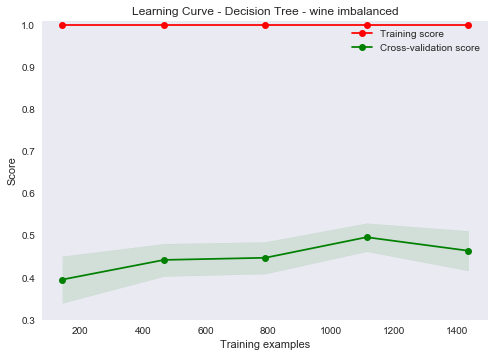

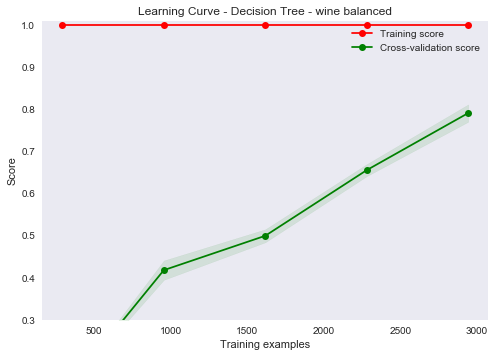

In [19]:
#1/3 test and 2/3 train for each fold
cv = StratifiedKFold(n_splits=10)

title = 'Learning Curve - Decision Tree - wine imbalanced'
plt, score = plot_learning_curve(clf_dt, title, X2, y2, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
plt.savefig('./output/dtree-wine-imbalanced.png')
plt.show()
title = 'Learning Curve - Decision Tree - wine balanced'
plt,score= plot_learning_curve(clf_dt, title, X2_up, y2_up, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
plt.savefig('./output/dtree-wine-balanced.png')
plt.show()

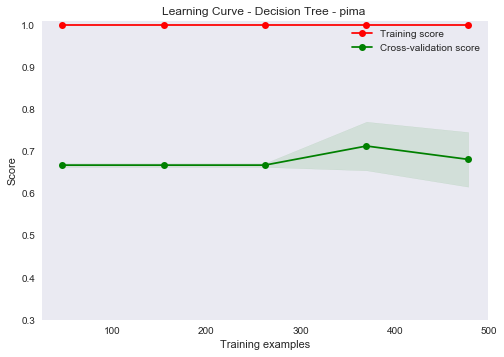

In [20]:
# on Pima 
title = 'Learning Curve - Decision Tree - pima '
plt,score = plot_learning_curve(clf_dt, title, X1, y1, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
plt.savefig('./output/dtree-pima.png')
plt.show()

#### 2. Parameters tuning.

The main risk of Decision Tree is overfitting. We see this property by noticing the score = 1 for training set : the DTree works perfectly on the training it is trained on. Indeed, it is a very flexible classifier that can easily try to fit perfectly the data it is trained on. Here it seems that balancing the dataset helped, but on Pima : the cross validation score is slightly decreasing after a certain amount of training examples (cf . learning curves).

We will use a sort of pruning to avoid overfitting and hence, to propose a more robust and general classifier. One way of finding

In [21]:
from sklearn.model_selection import GridSearchCV

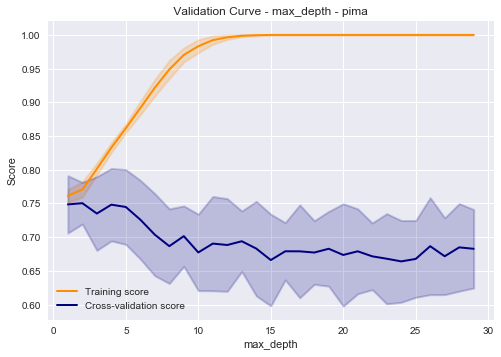

Best score for pima is 0.750374939526, max_depth = 1


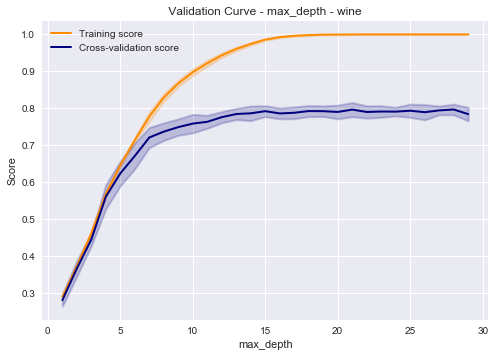

Best score for wine is 0.796702587528, max_depth = 27


In [42]:
# for pima
max_d = 30
title = " Validation Curve - max_depth - pima "
xlabel = "max_depth"
ylabel = "Score"

clf_dt.fit(X1, y1)
valid_curve_dt_pima, pima_dt_score, best_param = plot_validation_curve(clf_dt, title, xlabel, ylabel,X1, y1, param_name = 'max_depth', ylim=None, 
                              cv = cv, n_jobs = 1, param_range = np.arange(1, max_d))
valid_curve_dt_pima.savefig('./output/valid_curve_dt_pima.png')
valid_curve_dt_pima.show()
print("Best score for pima is " + str(pima_dt_score) + ", max_depth = " + str(best_param))

# for wine
title = " Validation Curve - max_depth - wine "
clf_dt.fit(X2_up, y2_up)
valid_curve_dt_wine, wine_dt_score, best_param = plot_validation_curve(clf_dt, title, xlabel, ylabel,X2_up, y2_up, param_name = 'max_depth', ylim=None, 
                              cv = cv, n_jobs = 1, param_range = np.arange(1, max_d))
valid_curve_dt_wine.savefig('./output/valid_curve_dt_wine.png')
valid_curve_dt_wine.show()
print("Best score for wine is " + str(wine_dt_score) + ", max_depth = " + str(best_param))

### 2. Neural Networks

In [23]:
from sklearn.neural_network import MLPClassifier
clf_nn_adam = MLPClassifier(solver='adam')
clf_nn_lbfgs = MLPClassifier(solver = 'lbfgs') # very heavy to compute (hessian every time)

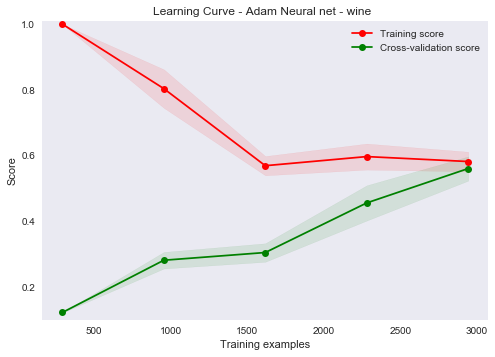

wine nn 0.560395911079


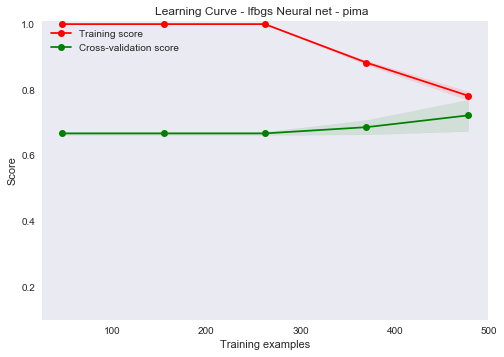

pima nn 0.722172499059


In [56]:
# sensibility 
#title = 'Learning Curve - Adam Neural net - wine imbalanced'
#plt, best_score = plot_learning_curve(clf_nn_adam, title, X2, y2, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
#plt.show()

title = 'Learning Curve - Adam Neural net - wine  '
plt, wine_nn_score  = plot_learning_curve(clf_nn_adam, title, X2_up, y2_up, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plt.savefig('./output/learning-curve-nn-wine.png')
plt.show()
print("wine nn " + str(wine_nn_score))
#title = 'Learning Curve - Quasi Newton Neural net - wine  '
##plt, best_score  = plot_learning_curve(clf_nn_lbfgs, title, X2_up, y2_up, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
#plt.show()

# adam to use : stochastic gradient descent on big dataset : performs better.
# lbfgs : use quasi newton optimization method : performs better on small dataset : ex with Pima.

#title = 'Learning Curve - Adam Neural net - pima  '
#plt, best_score  = plot_learning_curve(clf_nn_adam, title, X1, y1, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
#plt.show()

title = 'Learning Curve - lfbgs Neural net - pima  '
plt, pima_nn_score  = plot_learning_curve(clf_nn_lbfgs, title, X1, y1, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plt.savefig('./output/learning-curve-nn-pima.png')
plt.show()
print("pima nn " + str(pima_nn_score))

In [25]:
# pima 
# adam is overfitting
# quasi newton sounds more robust  : cross val score converge towards1  

### 3. Boosting

In [43]:
from sklearn.ensemble import AdaBoostClassifier
# use weak learner = dt
wk_learner_pima = tree.DecisionTreeClassifier(criterion = 'gini', max_depth= 2)
clf_adb = AdaBoostClassifier(wk_learner_pima)

# Make grid to search for optimal n_estimators (max of estimators at chich the algo stops) and learning_rate : 
# the contribution of each classifier by learning rate.
# There is a subtil trade off between those two parameters. Using a grid to find the optimal kopple is useful.

max_nestimators = 200
max_nlrate = 5
range_nestimators = np.arange(1, max_nestimators , 20)
range_nlrate = np.linspace(0.1, 2, max_nlrate)

parameter_grid = {'n_estimators' : range_nestimators,
                  'learning_rate' : range_nlrate}

grid = GridSearchCV(clf_adb,param_grid = parameter_grid,
                           cv = cv)

grid.fit(X1, y1)
pima_boo_score = grid.best_score_
print('Best score: {}'.format(pima_boo_score))
print('Best parameters: {}'.format(grid.best_params_))

Best score: 0.7800751879699248
Best parameters: {'learning_rate': 0.10000000000000001, 'n_estimators': 41}


/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


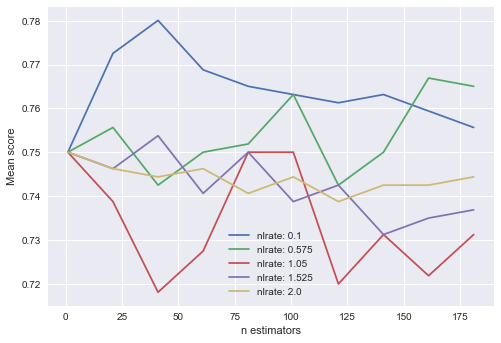

In [45]:
plt.figure()

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(range_nlrate), len(range_nestimators))

for ind, i in enumerate(range_nlrate):
    plt.plot(range_nestimators, scores[ind], label='nlrate: ' + str(i))
plt.legend()
plt.xlabel('n estimators')
plt.ylabel('Mean score')
plt.savefig('./output/grid_search_pima_boo')
plt.show()

Best score: 0.8572302048303271
Best parameters: {'learning_rate': 1.05, 'n_estimators': 81}


/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


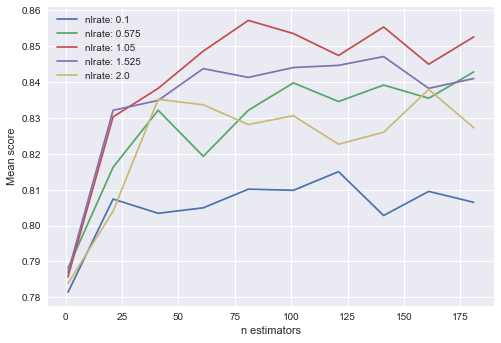

In [49]:
wk_learner_wine = tree.DecisionTreeClassifier(criterion = 'gini', max_depth= 15)
clf_adb = AdaBoostClassifier(wk_learner_wine)

grid = GridSearchCV(clf_adb,param_grid = parameter_grid,
                           cv = cv)
grid.fit(X2_up, y2_up)
wine_boo_score = grid.best_score_
print('Best score: {}'.format(wine_boo_score))
print('Best parameters: {}'.format(grid.best_params_))

plt.figure()

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(range_nlrate), len(range_nestimators))

for ind, i in enumerate(range_nlrate):
    plt.plot(range_nestimators, scores[ind], label='nlrate: ' + str(i))
plt.legend()
plt.xlabel('n estimators')
plt.ylabel('Mean score')
plt.savefig('./output/grid_search_wine_boo15')
plt.show()

First graph shows some kind of overfitting, after basically n_estimatore = 23 , all curves drop (more or less).
This is probably due to the size of our Pima dataset. Even if boosting algorithm doesnt tend to overfit, on very
small dataset, 21 estimators seems to be a limit after which adding tree with max_depth of 1 are just adding some
useless complexity and reduces the score. 

Second graphs, however shows a more real trend of Boosting. Indeed, on the wine dataset, scores tend to increase
proportionally with the number of n estimators to take into consideration.

Nevertheless, in both cases boosting score is way better (almost 80%) than simply applying a single weak learner.

### 4. Support Vector Machines

In [29]:
from sklearn import svm

# normalize because SVM uses distance as a metric to compute
clf_svm = svm.SVC()

cv_svm = StratifiedKFold(n_splits=10)

SVM is relatively robust but to better our result we should use a grid to find the best tuned parameters. Kernels and 
related degree are parameters to tunes.

Why kernels and degree ? SVM try to maximise the margin between the the classifier boundaries and the data. To do so, several 'kernels' can be tested to consider different similarity metrics between instances. As we can not visualize the repartition of our data, it is difficult to know in advance which kernel to apply. So a good way to deal with it, is to use, again a grid search to test all the different combinaisons and compare the results.

In [30]:
clf_svm = svm.SVC()
max_degree = 6
kernel_choices = ['linear', 'sigmoid', 'poly', 'rbf']
degree_choices = np.arange(1, max_degree)
gamma_choices = [1e-1, 1, 1e1]
C_choices = [1e-2, 1, 1e2]

parameters_grid = {
    'kernel' : kernel_choices,
    'degree' : degree_choices,
    'gamma' : gamma_choices,
    'C': [1e-2, 1, 1e2]
}
    
grid = GridSearchCV(
    clf_svm,
    param_grid = parameters_grid,
    cv = cv_svm
)  

print()
grid.fit(X1_nor, y1)
pima_svm_score = grid.best_score_
print('Best score: {}'.format(pima_svm_score))
print('Best parameters: {}'.format(grid.best_params_))


Best score: 0.7894736842105263
Best parameters: {'C': 100.0, 'degree': 1, 'gamma': 10.0, 'kernel': 'rbf'}


This result fits our first expectation : the pima dataset is not linearly separable. Instead the best model use a rbf (radial basis function) to maximise the margin between the classes. If we could visualize this multidimensional dataset we would eventually see a boundary with a 'circle shape' between the two classes. The High C and High gamma corresponds to the expectation we have when analysing the dataset : the intersection between the classes is relatively frequent and so the boundray has a complexe shape. The best svm needs to consider more instance as support vectors (high C) and gives more influence to the instances close to the boundary (high gamma).

In [31]:
clf_svm = svm.SVC()
max_degree = 6
kernel_choices = ['linear', 'sigmoid', 'poly', 'rbf']
degree_choices = np.arange(1, max_degree)
gamma_choices = [1e-1, 1, 1e1]
C_choices = [1e-2, 1, 1e2]

parameters_grid = {
    'kernel' : kernel_choices,
    'degree' : degree_choices,
    'gamma' : gamma_choices,
    'C': [1e-2, 1, 1e2]
}
                  

grid = GridSearchCV(
    clf_svm,
    param_grid = parameters_grid,
    cv = cv_svm
)  

grid.fit(X2_nor, y2)
wine_svm_score = grid.best_score_
print('Best score: {}'.format(wine_svm_score))
print('Best parameters: {}'.format(grid.best_params_))


clf_svm = svm.SVC()
max_degree = 6
kernel_choices = ['linear', 'sigmoid', 'poly', 'rbf']
degree_choices = np.arange(1, max_degree)
gamma_choices = [1e-1, 1, 1e1]
C_choices = [1e-2, 1, 1e2]

parameters_grid = {
    'kernel' : kernel_choices,
    'degree' : degree_choices,
    'gamma' : gamma_choices,
    'C': [1e-2, 1, 1e2]
}
                  

grid = GridSearchCV(
    clf_svm,
    param_grid = parameters_grid,
    cv = cv_svm
)  

grid.fit(X2_up_nor, y2_up)
wineUp_svm_score = grid.best_score_
print('Best score: {}'.format(wineUp_svm_score))
print('Best parameters: {}'.format(grid.best_params_))

Best score: 0.5778611632270169
Best parameters: {'C': 100.0, 'degree': 1, 'gamma': 10.0, 'kernel': 'sigmoid'}
Best score: 0.5074900642005503
Best parameters: {'C': 100.0, 'degree': 1, 'gamma': 10.0, 'kernel': 'rbf'}


First, this answers our first question, is wine data set linearly separable ? No. Instead a sigmoid kernel provides a better result. Also, we notice that a high C and high gamma is needed to provide the best score. This means that the best svm takes into account as much support vectors as possible (high C) to make its choice but consider the closest support vector with much more influence (high gamma). This is due to the vey complexe boundarie shape between the classes : multiclasses classification problems in high dimension with some highly variated feature.  

Score is very high for svm with rbf kernels on Pima dataset. This is because svm also performs well on small datasets
even if they are in high dimension (case of Pima). Comparing to other datasets.

#### 3. iteration curve: since svm is an iteration algorithm

/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Conv

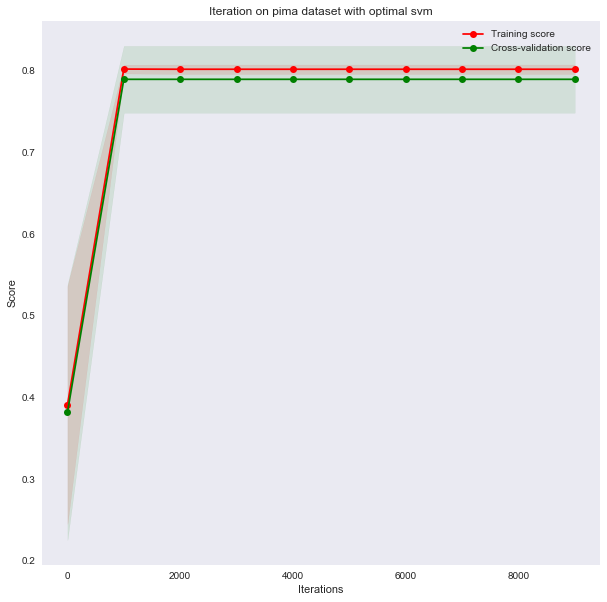

In [50]:
# degree can be ignoer out of poly
max_iter = 10000 # set really large to see where we should stop
title_pima = "Iteration on pima dataset with optimal svm"
svm_pima = svm.SVC(C = 100.0, gamma = 10.0, kernel = 'rbf')
plot = plot_iterative_learning_curve(svm_pima, title_pima, X1_nor, y1, ylim=None, cv = cv_svm, n_jobs=-1,
                              iterations=np.arange(1, max_iter, 1000))
plot.savefig('./output/iterative-pima-svm.png')
plot.show()

/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/alexisdurocher/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Conv

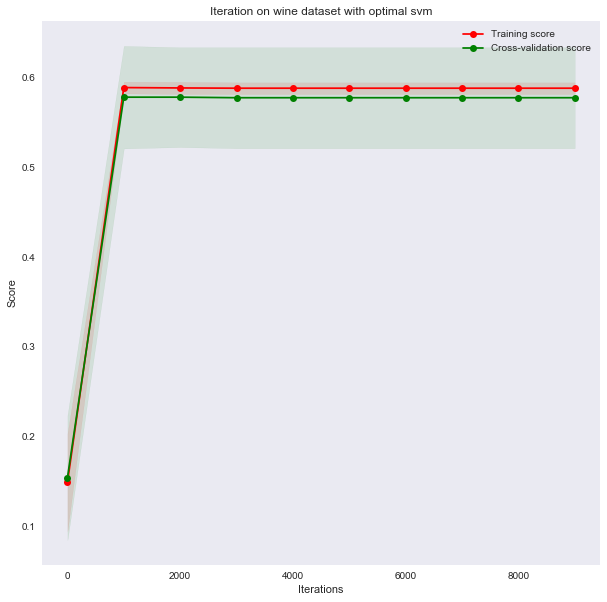

In [51]:
# degree can be ignoer out of poly
max_iter = 10000 # set really large to see where we should stop
title_pima = "Iteration on wine dataset with optimal svm"
svm_wine = svm.SVC(C = 100.0, gamma = 10.0, kernel = 'sigmoid')
plot = plot_iterative_learning_curve(svm_wine, title_pima, X2_nor, y2, ylim=None, cv = cv_svm, n_jobs=-1,
                              iterations=np.arange(1, max_iter, 1000))
plot.savefig('./output/iterative-wine-svm.png')
plot.show()

Only around 1800 iterations is required to reach the max score. Then no more overfitting but not interest : loose of time.

### 5. K Nearest Neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# let try with a k = 1
k = 1
clf_knn = KNeighborsClassifier(n_neighbors=k)

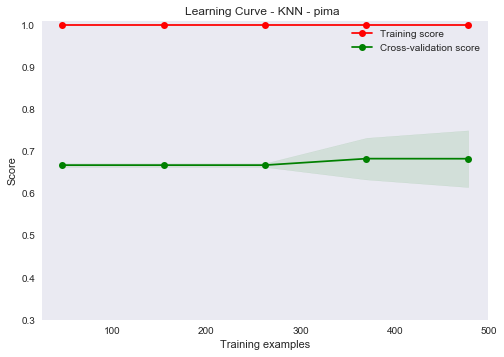

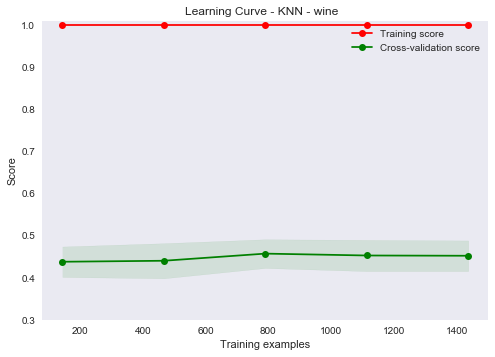

In [36]:
#X1_train or y1_train ?
title =  'Learning Curve - KNN - pima  '
plt, best_score = plot_learning_curve(clf_knn, title, X1_nor, y1, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
plt.show()
title =  'Learning Curve - KNN - wine  '
plt, best_score = plot_learning_curve(clf_knn, title, X2_nor, y2, ylim=(0.3, 1.01), cv=cv, n_jobs=4)
plt.show()

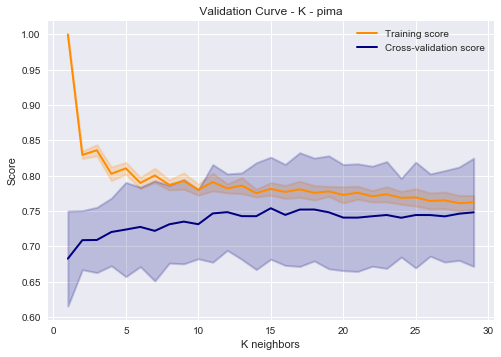

Best score for pima is 0.753901252486, K = 14


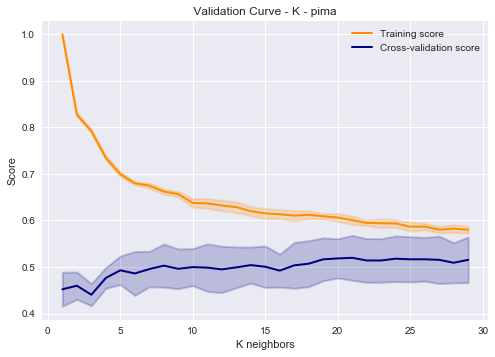

Best score for wine is 0.519757953082, K = 20


In [53]:
# finding K
# for pima
title = " Validation Curve - K - pima "
xlabel = "K neighbors"
ylabel = "Score"
k_range = np.arange(1,30,1)
clf_dt.fit(X1, y1)
valid_curve_knn_pima, pima_knn_score, best_param = plot_validation_curve(clf_knn, title, xlabel, ylabel,X1_nor, y1, param_name = 'n_neighbors', ylim=None, 
                              cv = cv, n_jobs = 1, param_range = k_range)
valid_curve_knn_pima.savefig('./output/valid-curve-pima-knn.png')
valid_curve_knn_pima.show()
print("Best score for pima is " + str(pima_knn_score) + ", K = " + str(best_param))

# for wine
title = " Validation Curve - K - pima "
clf_dt.fit(X2_nor, y2)
valid_curve_knn_wine, wine_knn_score, best_param = plot_validation_curve(clf_knn, title, xlabel, ylabel,X2_nor, y2, param_name = 'n_neighbors', ylim=None, 
                              cv = cv, n_jobs = 1, param_range = k_range)
valid_curve_knn_wine.savefig('./output/valid-curve-wine-knn.png')
valid_curve_knn_wine.show()
print("Best score for wine is " + str(wine_knn_score) + ", K = " + str(best_param))


classical example of overfitting . The model has 0 error on Training error : makes sense since every instance's first neighbor is itself. So there is obviously no error.

However it doesnt perform well on cross val data.

dimension curse. high variance even if normalized. classifier very sensible to high variance

## 6. Comparisons

In [52]:
raw_score_1 = np.array([pima_dt_score, pima_nn_score, pima_boo_score, pima_svm_score, pima_knn_score])
raw_score_2 = np.array([wine_dt_score, wine_nn_score, wine_boo_score, wine_svm_score, wine_knn_score])


raw_scores = pd.DataFrame({
        'pima-1' : raw_score_1,
        'vine-2' : raw_score_2,
    }, index = np.array(['D Tree', 'Nr Nets', 'Boosting', 'SVM', 'KNN']))

raw_scores.reindex(np.array(['D Tree', 'Nr Nets', 'Boosting', 'SVM', 'KNN']))

,pima-1,vine-2
D Tree,0.750375,0.796703
Nr Nets,0.735029,0.543544
Boosting,0.780075,0.857230
SVM,0.789474,0.577861
KNN,0.753901,0.519758
